In [5]:
%matplotlib widget
from pylab import *
from scipy.optimize import newton
from timeit import default_timer as timer
from itertools import accumulate
import ipywidgets as widgets
from IPython.display import display, Latex

In [6]:
# mappings
#------------------------
def fA(x, A = 1.0):
   return A*x*(1 - x)

def fB(x, B = 1.0):
   return B * sin(pi*x)
#------------------------

fA.__name__ = r'$Ax(1-x)$'
fB.__name__ = r'$B \sin (\pi x)$'
fA.param = 'A'
fB.param = 'B'
fA.param_range = [0, 4]
fB.param_range = [0, 1]

#----------------------------
# find period doubling 

def iterFunc(A, n = 1, f = fA):
    '''function to return result after 2**n iterations
        of mapping function'''
    
    y = xmax = 0.5
    for i in range(2**n):
        y = f(y,A)
    return y - xmax

def feig(f = fA):
    '''get estimate of Feigenbaum delta'''

    # initial, crude guesses for each map
    guess = [3.0, 3.4, 3.55] if f.param == 'A' else [0.77, 0.85, 0.86]
    
    #initial set-up:  Find first three A values:
    A = [0, newton(iterFunc, guess[0], args = (1, f)) ]
    A.append( newton(iterFunc, guess[1], args = (2, f)) )
    A.append( newton(iterFunc, guess[2], args = (3, f)) )

    #generate new guesses from old estimates of delta:
    for n in range(4,14):
        delta = (A[n-2] - A[n-3]) / (A[n-1] - A[n-2])
        guess = (A[n-1] - A[n-2])/delta + A[n-1]
        A.append( newton(iterFunc, guess, args=(n,f) , tol=1e-15) )

    return delta, array(A)
#----------------------------

delta, fA.doubles = feig()
delta, fB.doubles = feig(fB)
mapdict = {'logistic': fA, 'sin': fB}

## Iterative Mappings

A one-dimensional iterative mapping consists of using the output of a function as the input to that same function repeatedly.  For example, starting with an argument $x_0$ and a function $f(x)$:  $x_1 = f(x_0)$, $x_2 = f(x_1)$, $x_3 = f(x_2)$, etc.

<font color='green'>Aside:  (green comments will include more detailed explanations)  
    As an example, suppose $f(x) = x(1-x)$, and $x_0 = 0.20$.  Then $x_1 = f(x_0) = f(0.20) = 0.20 \times (1.0 - 0.20) = 0.20 \times 0.80 = 0.160$.  
    Then we calculate $x_2 = f(x_1) = 0.160 \times (1.000 - 0.160) = 0.160 \times 0.840 = 0.1344$.
    So the iterated values are:  0.20, 0.160, 0.1344, *etc.*
 </font>

### Mappings Used: 
Below we will be considering two mapping functions:  
#### 1.  The Logistic Mapping:  $$\boxed{f(x) = Ax(1-x)}$$
#### 2. The Sin Mapping: $$\boxed{f(x) = B\sin(\pi x)}$$

For the **logistic map**, $A$ is a constant between 0 and 4 ($A \in [0, 4]$), and for the **sin map**, the parameter $B$ is between 0 and 1,   $B \in [0, 1]$.

This process can be viewed geometrically by plotting both the mapping function and the function $y = x$ in a plot.  An initial value $x_0$ is chosen beween 0 and 1.  This is shown as the starting point for the dotted red line on the x-axis in the plot below.  The first vertical line segment going from this point up to the (<font color='blue'>blue</font>) plot of the mapping function shows the value of $f(x_0)$.  The process of setting a new $x_1$ variable equal to $f(x_0)$ is depicted by the connected *horizontal* red dotted line leading from $f(x_0)$ to the (black) line y = x.  The next vertical segment depicts $f(x_1)$, which is then set equal to the $x_2$ value in the following horizontal segment, *etc.*    
<br />
<font color='green'>
You can see the above sequence of iterated values in the default plot below *i.e.* before you change any of the controls below the plot.  To see the sequence better, click on the square icon for 'zoom' in the row of icons immediately below the plot.  If you hover the mouse on the icon, you should see the word 'zoom' appear.  After clicking on the icon, use your mouse to select a rectangle to zoom the figure to inside the plot itself.  To undo the zoom to the previous level of zooming, click the left-arrow icon.  To go back to the original plot, click the little house 'home' icon.
</font>

### Things to try:
#### (1)  Follow the mapping iterations
(a) Set the number of iterations in the control to 0 (highlight the number with the mouse, enter '0', then click somewhere outside the control).  Now, use the up-arrow on the right side of the control to increase the number of iterations one by one.  For each increase in iteration, you should see a vertical segment and a horizontal segment added, as described above.  You can identify any position in the plot by hovering the mouse over the point of interest; the x and y values for the mouse location will be shown on the bottom right of the figure.

(b)  Use the slider to set the value of $A$ to (about) 2.00.  Repeat the process in (a) to see the iterations for this new value of $A$.

(c)  Set the value of $A$ to just a bit less than 3.00, maybe 2.95 or so.  Follow the iterations again.

#### (2) Note the changes that happen at $A$ = 1.00 and $A$ = 3.00
(a)  Set the number of iterations to 100.  Change the value of $A$.  The change at $A$ = 1.00 is a bit subtle, but for $A$ < 1.00, the iterations always converge to 0; above $A$ = 1.00 (and below $A$ = 3.00), they converge to the point where the black line intersects the blue curve.  This is a bit hard to see for $A$ close to 1.00, but is obvious for values like $A$ = 1.50.  Use the zoom rectangle to investigate.

(b)  With the number of iterations set to 100, look at the difference between a value of A = 2.95 or so (just below 3.00) and a value of $A$ = 3.05 or so (a bit above 3.00).  Below $A$ = 3.00, the iterations converge to a single point.  Above $A$ = 3.0, they converge to *two* separate points.  

#### (3)  Try different initial values for x
Set the value of $A$ to something intermediate like $A$ = 2.8 or so, and keep the number of iterations at 100.  Then use the 'starting x' slider to investigate what happens when the whole process is started with a different initial value.  What happens if $A$ = 3.1 or so, and different initial values are used?

#### (4) Compare results with the second mapping
Select the 'sin' mapping, note how it behaves similarly, albeit with a different range of parameter values.

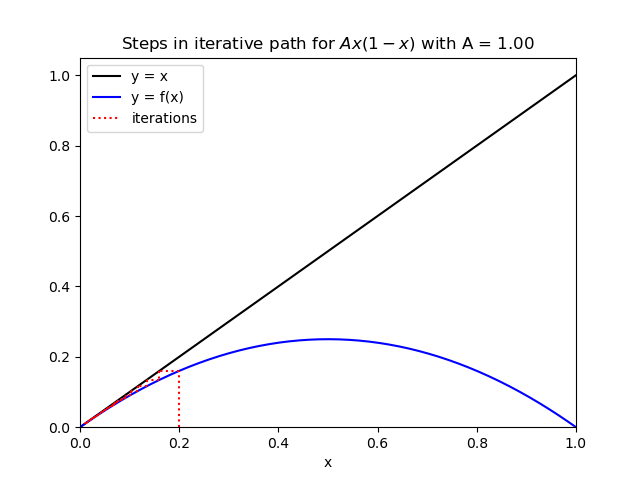

In [7]:
fig2 = figure("showpath")

def showpath(x = 0.2, A = 1.0, nIter = 100, f = fA):
    fig2 = figure("showpath")
    ax = fig2.gca()
    ax.cla()
    # start = timer()
    yold = 0.0
    # set line type for path
    path = "r:"
    # plot line y = x
    plot([0, 1], [0, 1], 'k')                 
    xcurve = linspace(0, 1, 200)
    # plot iterative mapping function 
    plot(xcurve, f(xcurve, A), 'b')

    # add vertical and horizontal steps for each iteration
    for i in range(nIter):
        ynew = f(x, A)
        if abs(ynew - yold) < 1e-8:
           break
        plot([x, x], [yold, ynew], path)      #vertical step
        plot([x, ynew], [ynew, ynew], path)   #horizontal step
        x = yold = ynew

    legend(["y = x", "y = f(x)", "iterations"], loc='best')
    title("Steps in iterative path for %s with %s = %0.2f"
                % (f.__name__, f.param, A))
    xlim([0, 1])
    ylim(bottom = 0)
    xlabel('x')
    # print("elapsed time: ", timer() - start)
    show()
    
showpath()
drop_layout = widgets.Layout(width = '145px')
int_layout = widgets.Layout(width = '150px')
drop_map_path = widgets.Dropdown(options = mapdict.keys(), layout = drop_layout, value = "logistic")
path_N = widgets.IntText(value = 100, description = "# Iterations", layout = int_layout)

start = widgets.FloatSlider(value = 0.2, min = 0.0, max = 1.0, step = 0.01, description = "Starting x",
                           readout = True, readout_format = '.2f', continuous_update = True)
Aval = widgets.FloatSlider(value = 1.0, min = 0.0, max = 4.0, step = 0.01, description = "A",
                          readout = True, readout_format = '.2f', continuous_update = False)

def resetPlot(change):
    f = mapdict[drop_map_path.value]
    Amin, Amax = f.param_range
    A = Aval.value
    if change['owner'] == drop_map_path:
        ratio = Amax / Aval.max
        A = A * ratio
        Aval.max = Amax
        Aval.value = A
        
    x = start.value
    showpath(x = x, A = A, f = f, nIter = path_N.value)
    
    
drop_map_path.observe(resetPlot, names = 'value')
start.observe(resetPlot, names = 'value')  
Aval.observe(resetPlot, names = 'value')
path_N.observe(resetPlot, names = 'value')

first_row = widgets.HBox([drop_map_path, path_N])
second_row = widgets.HBox([start, Aval])
widgets.VBox([first_row, second_row])

### Points of Convergence

To better see what is going on with these mappings, let's plot the results in a different way.

Consider the logistic map.  For each value of the mapping parameter (like $A$ = 2.34), iterate the mapping 100 times, and ignore the results.  Now iterate the mapping 100 more times, and plot the values of the results as vertical-valued dots above the value of $A$ (plotted on the horizontal axis).  So, for values like A = 0.80, where the itereations converge to 0, there will be 100 dots plotted at $A$ = 0.80, y = 0.0.  When $A$ = 2.0, the iteration converges to y = 0.50, so there will be 100 dots plotted at the point ($A$ = 2.0, y = 0.5).  But when there are two convergence points, there will be dots plotted at each value...

The result is shown in the 'dotplot' below.  The dots are all at a vertical value of zero for $A \le 1.0$.  Then they increase, with only one value for each value of $A$, up until approximately $A = 3.0$, where there is a sudden bifurcation into two branches!  Then, at about $A = 3.44$, each of those two branches bifurcates again!  This "period doubling" then occurs with shorter and shorter increases in $A$, until, at some point, the results become completely **chaotic**.

### Things to Try:  

#### (1)  Self-similarity  
Set the mapping function to 'logistic', and set the starting value to about $A$ = 3.00.  Now, using the zoom tool, zoom in on a rectangle selecting the top bifurcation area in the resulting plot (roughly $A$ = 3.4 to about $A$ = 3.6 or so, and vertical values of about 0.78 to 0.94 or so).  The resulting plot should look very similar to the plot you had before zooming, except for fewer points.  This is an example of the 'self similarity' of this structure.  If the plot had an infinite number of points, you could keep zooming in on the upper bifurcation over and over again and would get the same plot each time... indefinitely!  

#### (2)  Mapping similarity  
Change the mapping function to 'sin'.  Note the basic similarity in the shape of the resulting plot, albeit with different values of the parameter $B$, and slightly different shape.

#### (3) Period Doubling  
To see the period doubling, check the "show periods" check box below the plot.  Vertical red dashed lines will appear showing the location of each region of $2^n$ convergence points, *i.e.* one for 2 convergence points, one for 4, then 8, *etc.*  (The line appears roughly at the mid-point of each such region; though there is a more technical description of each location, but it doesn't really matter for our purposes).   

Here's the astonishing result:  if you calculate the ratio of the gaps consecutive period doublings (formal equation below), and then take the limit of that ratio as the doublings increase, the value converges to a well defined limiting value!  Moreover, and perhaps more surprising, calculating this limiting ratio for the logistic mapping gives **the same value** as for the sin mapping!!  In some sense, they really are the same phenomena!!

To describe this a bit more precisely, let $A_n^S$ represent the location of the red vertical line (*i.e.* the value of the parameter $A$ for the logistic map) for the $n^{th}$ doubling (similarly define $B_n^S$ be the equivalent value of $B$ for the sin mapping).  Then:

$$\delta = \lim_{n \to \infty} \frac{A_n^S - A_{n-1}^S}{A_{n+1}^S - A_n^S}= \lim_{n \to \infty} \frac{B_n^S - B_{n-1}^S}{B_{n+1}^S - B_n^S}$$  

The resulting value of $\delta$ is a sort of universal constant for 1-D mappings that lead to chaos, and is known as  

## Feigenbaum's delta:  $\delta = 4.66920161...$


<IPython.core.display.Javascript object>


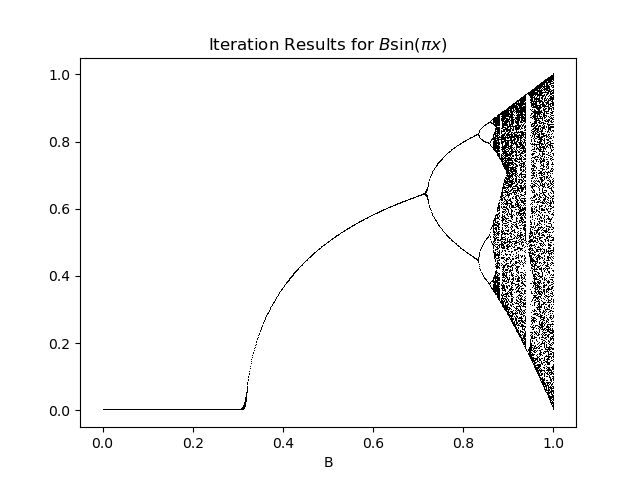

In [4]:
fig = figure("dotplot")  

def dotplot(Astart = 0, Aend = 4.0, nPts = 1000, f = fA):
    fig = figure("dotplot")
    Amin, Amax = f.param_range
    Astart = max(Astart, Amin)
    Aend = min(Aend, Amax)
    ax = fig.gca()
    ax.cla()
    # start = timer()
    
    
    result = []
    Arange = linspace(Astart, Aend, nPts)
    xStart = 0.2  # arbitrary choice; see 'showpath'
    for A in Arange:
      y = f(xStart, A)
      # throw away first 100:
      for i in range(100):
         y = f(y, A)
         
      # keep next 100 points for plotting:
      ans = []
      for i in range(100):
         y = f(y, A)
         ans.append(y)
      result.append(ans)
      
    plot(Arange, result, 'k,')
    title("Iteration Results for %s" % f.__name__)
    xlabel(f.param)
    # print("elapsed time: ", timer() - start)
    show()     # uncomment show for stand-alone use

dotplot()    
drop_layout = widgets.Layout(width = '200px')
num_layout = widgets.Layout(width = '75px')
check_layout = widgets.Layout(width = '200px')
hbox_layout = widgets.Layout(left='40px', width = '200px')

drop_map = widgets.Dropdown(options = mapdict.keys(), layout = drop_layout, value = "logistic", description = "Map")
A_label = widgets.Label(value = "      Number of points on A axis", layout = hbox_layout)
n_pts = widgets.IntText(value = 1000, description = "", layout = num_layout)
check_double = widgets.Checkbox(value=False, description = "Show periods", layout = check_layout)
slideRange = widgets.FloatRangeSlider(value = [0.0, 4.0], min = 0.0, max = 4.0, step = 0.01, description = "Start",
                                orientation = 'horizontal', readout = True, readout_format = '.2f',
                                     continuous_update = False)

def resetDotPlot(change):
    Astart, Aend = slideRange.value
    f = mapdict[drop_map.value]
    # when changing mapping, update slider range and make values proportional
    if change['owner'] == drop_map: 
        Amin, Amax = f.param_range
        length = Amax - Amin
        old_length = slideRange.max - slideRange.min
        ratio = length / old_length
        Astart = Astart *  ratio
        Aend = Aend * ratio
        slideRange.min = Amin
        slideRange.max = Amax
        slideRange.value = [Astart, Aend]
        
        
    dotplot(Astart = Astart, Aend = Aend, f = f,
           nPts = n_pts.value)
    if check_double.value:
        visiLines = f.doubles[(f.doubles>Astart)*(f.doubles<Aend)]
        vlines(visiLines, ymin=0, ymax=1, ls='--', linewidths = 0.5, colors = 'red')
    
drop_map.observe(resetDotPlot, names = 'value')
slideRange.observe(resetDotPlot, names = 'value')  
check_double.observe(resetDotPlot, names = 'value')
n_pts.observe(resetDotPlot, names = 'value')

first_row = widgets.HBox([drop_map, A_label, n_pts, check_double] )
widgets.VBox([first_row, slideRange])

In [5]:

%%html
<style>
div.input {
    display:none;
}
</style>